In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import r2_score
%run -i '../../../../../../utils.py'

# Get data

In [7]:
# read meta data
df_meta = pd.read_excel('../../../../../../our_data/meta_data.xlsx', index_col=0)
df_meta = df_meta[df_meta.Diet=='Inulin']
df_meta = df_meta.drop('Diet', axis=1)
df_meta = df_meta.rename({'MiceID':'SubjectID'}, axis=1)
df_meta.head()

,SubjectID,Vendor,Day,RandomizedGroup
SampleID,,,,
sample141,BI1,Beijing,0,A
sample142,BI2,Beijing,0,B
sample143,BI3,Beijing,0,D
sample144,BI4,Beijing,0,E
sample145,BI5,Beijing,0,C


In [8]:
# read SCFA data
df_scfa = pd.read_excel('../../../../../../our_data/SCFA.xlsx', index_col=0)
df_scfa.head()

,Acetate,Propionate,Butyrate
SampleID,,,
sample36,1.372492,0.463378,0.553858
sample86,2.019028,0.644090,0.757294
sample277,2.061243,1.140312,1.142147
sample116,2.066010,0.856857,0.582644
sample69,2.644383,0.955464,0.682562


In [9]:
# read bacterial abundance
df_bac = pd.read_excel('../../../../../../our_data/16S_absolute_abundance.xlsx', index_col=0)
df_bac = df_bac/df_bac.max().max()
df_bac.head()

,A2,ASF356,Acetatifactor,Acetatifactor-muris,Acidovorax,Acinetobacter,Acinetobacter-sp.-CIP-56.2,Acutalibacter-muris,Adlercreutzia-mucosicola,Adlercreutzia-muris,...,[Eubacterium]-ventriosum-group,[Eubacterium]-xylanophilum-group,[Ruminococcus]-gnavus-group,[Ruminococcus]-torques-group,bacterium-enrichment-culture-clone-M153,gut-metagenome,human-gut-metagenome,marine-metagenome,metagenome,mouse-gut-metagenome
SampleID,,,,,,,,,,,,,,,,,,,,,
sample131,0.0,0.000291,0.000019,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000170,0.0,0.0,0.0,0.000444,0.0,0.0,0.0,0.000356
sample132,0.0,0.001090,0.000135,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000215,0.0,0.0,0.0,0.000286,0.0,0.0,0.0,0.002698
sample133,0.0,0.000097,0.000122,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000597,0.0,0.0,0.0,0.000502
sample134,0.0,0.001303,0.000027,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000285,0.0,0.0,0.0,0.002473,0.0,0.0,0.0,0.002344
sample135,0.0,0.000246,0.000114,0.0,0.0,0.0,0.0,0.0,0.000034,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.001565,0.0,0.0,0.0,0.001435


# Run RandomForest

In [10]:
for group_to_exclude in ['A','B','C','D']:
    df_rf_reg, df_rf_opt_paras, _ = train_scfa_dynamics_model(
        df_meta = df_meta, 
        df_bac = df_bac, 
        df_scfa = df_scfa, 
        target_scfa=['Acetate','Butyrate','Propionate'],
        topN=40,
        exclude_group=group_to_exclude,
        exclude_vendor=None,
        model='RandomForest',
        use_deriv_scfa=False,
        use_deriv_microbiome=None
    )
    df_rf_opt_paras.to_csv('optimal_rf_parameters_exclude_group%s.csv'%(group_to_exclude))
    df_rf_reg.to_csv('rf_regression_exclude_group%s.csv'%(group_to_exclude))

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:   42.3s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  4.5min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  4.4min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  4.4min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  4.4min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  4.3min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  4.4min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  4.4min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  4.4min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  4.4min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:   38.9s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  4.4min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  4.4min finished


Fitting 5 folds for each of 480 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 36 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1913 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed:  4.2min finished


In [11]:
df_train_error = None
for idx, group_to_exclude in enumerate(['A','B','C','D']):
    df_tmp = get_rf_training_error(
        df_meta = df_meta, 
        df_bac = df_bac, 
        df_scfa = df_scfa, 
        target_scfa=['Acetate','Butyrate','Propionate'],
        topN=40,
        exclude_group=group_to_exclude,
        exclude_vendor=None,
        use_deriv_scfa=False,
        use_deriv_microbiome=False
    )
    df_tmp['TrainSetLabel'] = 'ExcludeGroup'+group_to_exclude
    if idx==0:
        df_train_error = df_tmp
    else:
        df_train_error = pd.concat([df_train_error, df_tmp], ignore_index=True)
df_train_error.to_csv('training_error_intrapolation.csv')

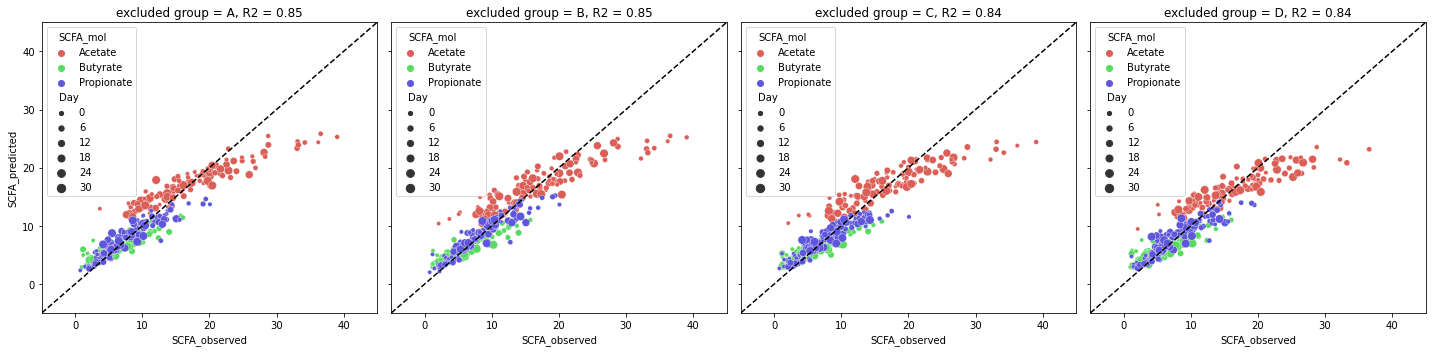

In [12]:
fig, ax = plt.subplots(figsize=(20,5), nrows=1, ncols=4, sharex=True, sharey=True)

for idx, group_to_exclude in enumerate(['A','B','C','D']):
    df_train_error = get_rf_training_error(
        df_meta = df_meta, 
        df_bac = df_bac, 
        df_scfa = df_scfa, 
        target_scfa=['Acetate','Butyrate','Propionate'],
        topN=40,
        exclude_group=group_to_exclude,
        exclude_vendor=None,
        use_deriv_scfa=False,
        use_deriv_microbiome=False
    )
    _ = sns.scatterplot(x='SCFA_observed',y='SCFA_predicted', hue='SCFA_mol', size='Day', palette=sns.color_palette("hls", 3), data=df_train_error, ax=ax[idx])
    _ = ax[idx].plot([-5,45],[-5,45],'k--')
    _ = ax[idx].set_xlim([-5,45])
    _ = ax[idx].set_ylim([-5,45])
    _ = ax[idx].set_title('excluded group = %s, R2 = %2.2f'%(group_to_exclude,r2_score(df_train_error.SCFA_observed, df_train_error.SCFA_predicted)))
                
plt.tight_layout()